# Lec 08A: The RNN layer


In this practical, we shall learn two different ways to use the RNN layer. We shall mainly perform inference using an RNN layer. We shall learn how to use the layer to build an RNN network in the second part of this lab.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

---
## 1. Creating a RNN layer


In this section, you shall take a look at how the PyTorch RNN layer really works in practice by instantiating an RNN layer and see the dimensions of the tensors of the input and output.

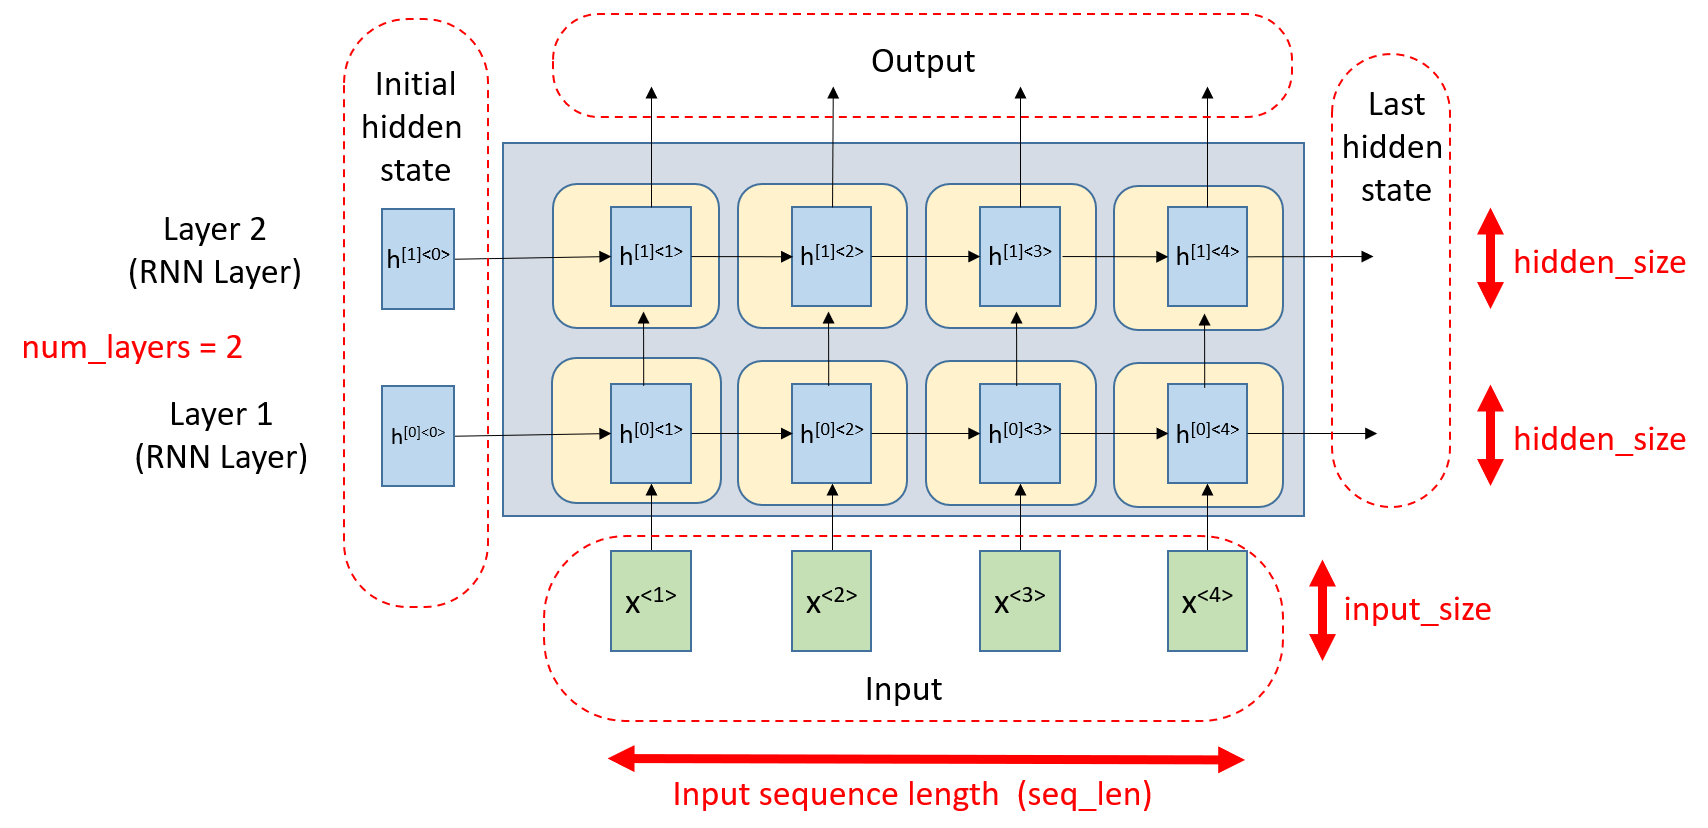

### The `torch.nn.RNN` module 

Reference: [torch.nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

```
output = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first, bidirectional)
```

* Parameters:
    * **input_size** – The number of features in an input token $x^{<t>}$ at time step $t$. 
    * **hidden_size** – The number of features in the hidden state $h^{<t>}$ at time step $t$.
    * **num_layers** – Number of recurrent layers. E.g., setting `num_layers=2` would mean stacking two RNN layers, with the second RNN layer taking the outputs of the first RNN layer and computing the final results. Default: 1
    * **batch_first** – If `True`, then the input and output tensors are provided as `(batch, seq, feature)`. Default: `False`
    * **bidirectional** – If `True`, becomes a bidirectional RNN. Default: `False`
    

* Inputs: X, h_0
    * **X** is the batch sequence data input. It has a shape of  `(seq_len, batch, input_size)` when `batch_first = False` (default) or `(batch, seq, feature)` when `batch_first = True`. 
    * **h_0** of shape `(num_layers*num_directions, batch, hidden_size)`: tensor containing the initial hidden state for each element in the batch. If the RNN is bidirectional, num_directions shoudl be 2, else it should be 1.

* Outputs: output, (h_n, c_n)
    * **out** of shape `(seq_len, batch_num, num_directions*hidden_size)`: tensor containing the output features from the last layer of the RNN for each $t$. 
    * **h_n** of shape `(num_layers*num_directions, batch, hidden_size)`: hidden state for the last time step $t$ = `seq_len`

### Input Format for the RNN layer

There are two input format for the RNN layer:

| `batch_first` | Shape of the input matrix | Description |
|:---:|:---:|:---:|
| `False` | `(seq_len, batch_size, input_size)` | (seq, batch, fea) |
| `True` |  `(batch_size, seq_len, input_size)` | (batch, seq, fea) |

* The sequence first configuration (`batch_first=False`) defines *time* as the first dimension. Implementing a `for` loop on the seq-first data allows us to process all samples concurrently one time step at a time.
* The batch first configuration (`batch_first=True`) defines the *batch sample* as the first dimension. Implementing a `for` loop on the batch-first  data allows us to process one sample at a time for all time steps.

### Creating RNN

Create an RNN layer with the following settings:
* the hidden size `hidden_size` is set to 64 units 
* the number of layers `num_layers` = 1
* the layer is uni-directional `bidirectional` = `False`
* the layer accepts input samples with input dimension `input_size=128`. 
* Uses `batch_first` = `False` (default setting)

In [2]:
hidden_size   = 64     # hidden_size
input_size    = 128    # input_size
num_layers    = 1      # number of layers
bidirectional = False  # unidirectional
batch_first   = False  # data format (time, batch, feature)

In [3]:
rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=batch_first)
print(rnn)

RNN(128, 64)


When you create an LSTM layer, there is **no** need to specify **the length of the input sequence** or the **length of output sequence**. All you need to do is to define the internal structures of the network. 

## 2. Simple Inference with LSTM

### Creating the input

Since we set `batch_first=False`, the input is a tensor of shape `(inseq_len, batch_size, input_size)`. To test the code, we generate some dummy input to test our LSTM layer. In the following, create a dummy input with a *batch size* 4 and *input sequence length* 5.

In [4]:
seq_len     = 5  # input sequence length
batch_size  = 4  # batch size

In [5]:
X = torch.randn(seq_len, batch_size, input_size)
print('Shape of X:', X.shape)

Shape of X: torch.Size([5, 4, 128])


### Initializing hidden state

By default, the input to the first hidden state `h_0` is reset to all 0s. We can also initialize `h_0` through the 2nd argument. For uni-directional RNN, `h_0` has the shape `(num_layers, batch_size, hidden_size)`. 

In [6]:
h_0 = torch.randn(num_layers, batch_size, hidden_size)
print('Shape of h_0:', h_0.shape)

Shape of h_0: torch.Size([1, 4, 64])


### Performing inference

The rnn layer receives the `X` and `h_0` (optional) as input and then outputs `out` and `h_n`. 
* The shape of `out` is `(seq_len, batch_size, hidden_size)` because of the `batch_first` = `False` setting. 
* The shape of `h_n` is `(num_layers, batch_size, hidden_size)`.

In [7]:
out, h_n = rnn(X, h_0)

print('Shape of out:', out.shape)
print('Shape of h_n:', h_n.shape)

Shape of out: torch.Size([5, 4, 64])
Shape of h_n: torch.Size([1, 4, 64])


## Input with different time sequence

The model can accept input sequence of different length.

Consider inseq_len = 20

In [9]:
X = torch.randn(20, batch_size, input_size)
out, _ = rnn(X)            
print(out.shape)

torch.Size([20, 4, 64])


Consider inseq_len = 30

In [10]:
X = torch.randn(30, batch_size, input_size)
out, _ = rnn(X)            
print(out.shape)

torch.Size([30, 4, 64])


Consider inseq_len = 50

In [11]:
X = torch.randn(50, batch_size, input_size)
out, _ = rnn(X)            
print(out.shape)

torch.Size([50, 4, 64])


---

## Exercise

1. Create the RNN layer for the following image. 
    * Use the `batch first` = True data format. 
    * Sample a random input sequence `X` with `batch size` = 16 and input sequence length `seq_len` = 25 from a normal distribution (`torch.randn`). 
    * Sample the initial state `h_0` from a normal distribution (`torch.randn`)  
    * Perform the inference with the generated random input
    * Lastly, print the shape of the (1) generated output sequence, (2) output hidden state and (3) output cell state.

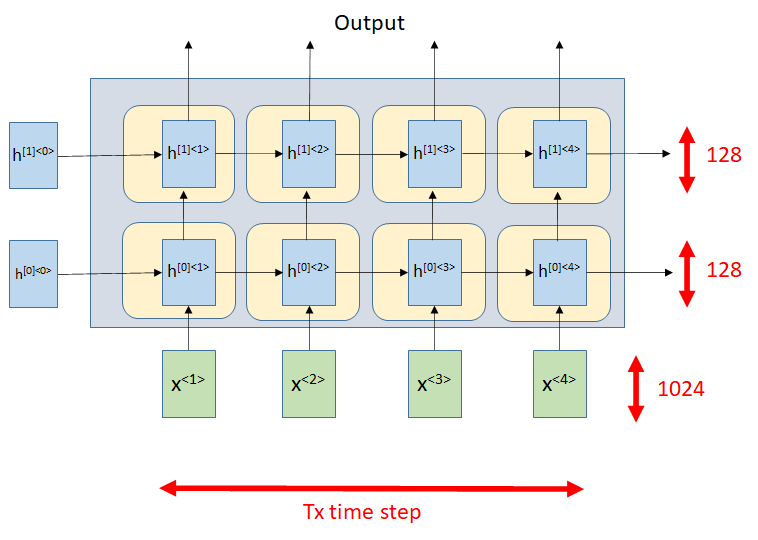

In [ ]:
# ... your code here ...